In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
np.random.seed(0)

In [3]:
x_dev = pd.read_csv('/Users/jennaiorio/Documents/Columbia/Spring 2024/Applied Machine Learning/Final Project/x_train_2.csv', index_col=[0])
y_dev = pd.read_csv('/Users/jennaiorio/Documents/Columbia/Spring 2024/Applied Machine Learning/Final Project/y_train_2.csv', index_col=[0])
x_test = pd.read_csv('/Users/jennaiorio/Documents/Columbia/Spring 2024/Applied Machine Learning/Final Project/x_test_2.csv', index_col=[0])
y_test = pd.read_csv('/Users/jennaiorio/Documents/Columbia/Spring 2024/Applied Machine Learning/Final Project/y_test_2.csv', index_col=[0])

In [4]:
y_dev = np.ravel(y_dev)
y_test = np.ravel(y_test)

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_dev, y_dev, train_size=0.8, random_state=0)

In [6]:
# Checking for highly correlated features
# There are none

high_corr = []
for i, category1 in enumerate(x_dev.columns):
    for category2 in x_dev.columns[i:]:
        if category1 == category2:
            continue
        if (x_dev.corr()[category1][category2] >= 0.9 or 
            x_dev.corr()[category1][category2] <= -0.9):
            high_corr.append((category1, category2, x_dev.corr()[category1][category2]))
high_corr

[]

In [7]:
# Scale features

ss = StandardScaler()
x_train_sc = ss.fit_transform(x_train)
x_val_sc = ss.transform(x_val)
x_test_sc = ss.transform(x_test)

In [8]:
# Linear SVC

scores = {}

model = LinearSVC(dual=False, random_state=0)
model.fit(x_train, np.ravel(y_train))

pred_train = model.predict(x_train)
train_score = np.mean(pred_train == y_train)
scores['Train Score'] = train_score

pred_val = model.predict(x_val)
val_score = np.mean(pred_val == y_val)
scores['Validation Score'] = val_score

pred_test = model.predict(x_test)
test_score = np.mean(pred_test == y_test)
scores['Test Score'] = test_score

scores

{'Train Score': 0.9355007865757735,
 'Validation Score': 0.8784067085953878,
 'Test Score': 0.6027397260273972}

In [9]:
# Linear SVC with scaled data

scores = {}

model = LinearSVC(dual=False, random_state=0)
model.fit(x_train_sc, np.ravel(y_train))

pred_train = model.predict(x_train_sc)
train_score = np.mean(pred_train == y_train)
scores['Train Score'] = train_score

pred_val = model.predict(x_val_sc)
val_score = np.mean(pred_val == y_val)
scores['Validation Score'] = val_score

pred_test = model.predict(x_test_sc)
test_score = np.mean(pred_test == y_test)
scores['Test Score'] = test_score

scores

{'Train Score': 0.940744625065548,
 'Validation Score': 0.8846960167714885,
 'Test Score': 0.5616438356164384}

In [10]:
# Linear SVC training on whole dev set

scores = {}

model = LinearSVC(dual=False, random_state=0)
model.fit(x_dev, np.ravel(y_dev))

pred_dev = model.predict(x_dev)
dev_score = np.mean(pred_dev == y_dev)
scores['Dev Score'] = dev_score

pred_test = model.predict(x_test)
test_score = np.mean(pred_test == y_test)
scores['Test Score'] = test_score

scores

{'Dev Score': 0.9303691275167785, 'Test Score': 0.5684931506849316}

In [11]:
# Grid search for Linear SVC

model = LinearSVC(dual=False, max_iter=10000, penalty='l1', loss='squared_hinge', random_state=0)

param_grid = {'C': [0.1, 1, 10, 100, 1000]}
cv = RandomizedSearchCV(model, param_grid, random_state=0)
search = cv.fit(x_train, y_train)
search.best_estimator_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244:

LinearSVC(C=1, dual=False, max_iter=10000, penalty='l1', random_state=0)

In [12]:
# Linear SVC with first hyperparameters

scores = {}

model = LinearSVC(dual=False, max_iter=10000, penalty='l1', loss='squared_hinge', C=1, random_state=0)
model.fit(x_train, np.ravel(y_train))

pred_train = model.predict(x_train)
train_score = np.mean(pred_train == y_train)
scores['Train Score'] = train_score

pred_val = model.predict(x_val)
val_score = np.mean(pred_val == y_val)
scores['Validation Score'] = val_score

pred_test = model.predict(x_test)
test_score = np.mean(pred_test == y_test)
scores['Test Score'] = test_score

scores

{'Train Score': 0.9386470896696382,
 'Validation Score': 0.8951781970649895,
 'Test Score': 0.589041095890411}

In [13]:
# Grid search for dual SVC

model = LinearSVC(dual=True, max_iter=10000, penalty='l2', loss='hinge', random_state=0)

param_grid = {'C': [0.1, 1, 10, 100, 1000]}
cv = RandomizedSearchCV(model, param_grid, random_state=0)
search = cv.fit(x_train, y_train)
search.best_estimator_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244:

LinearSVC(C=1, loss='hinge', max_iter=10000, random_state=0)

In [14]:
# Dual Linear SVC with second hyperparameters
# leave this out
scores = {}

model = LinearSVC(dual=True, max_iter=20000, penalty='l2', loss='hinge', C=1, random_state=0)
model.fit(x_train, np.ravel(y_train))

pred_train = model.predict(x_train)
train_score = np.mean(pred_train == y_train)
scores['Train Score'] = train_score

pred_val = model.predict(x_val)
val_score = np.mean(pred_val == y_val)
scores['Validation Score'] = val_score

pred_test = model.predict(x_test)
test_score = np.mean(pred_test == y_test)
scores['Test Score'] = test_score

scores

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Train Score': 0.9145254326166754,
 'Validation Score': 0.8679245283018868,
 'Test Score': 0.547945205479452}

In [15]:
# Grid search for Linear SVC on scaled data
# results are the same as on unscaled data

model = LinearSVC(dual=False, max_iter=10000, penalty='l1', loss='squared_hinge', random_state=0)

param_grid = {'C': [0.1, 1, 10, 100, 1000]}
cv = RandomizedSearchCV(model, param_grid, random_state=0)
search = cv.fit(x_train_sc, y_train)
search.best_estimator_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244:

LinearSVC(C=1, dual=False, max_iter=10000, penalty='l1', random_state=0)

In [16]:
# Linear SVC with first hyperparameters on scaled data

scores = {}

model = LinearSVC(dual=False, max_iter=10000, penalty='l1', loss='squared_hinge', C=1, random_state=0)
model.fit(x_train_sc, np.ravel(y_train))

pred_train = model.predict(x_train_sc)
train_score = np.mean(pred_train == y_train)
scores['Train Score'] = train_score

pred_val = model.predict(x_val_sc)
val_score = np.mean(pred_val == y_val)
scores['Validation Score'] = val_score

pred_test = model.predict(x_test_sc)
test_score = np.mean(pred_test == y_test)
scores['Test Score'] = test_score

scores

{'Train Score': 0.9428421604614577,
 'Validation Score': 0.8805031446540881,
 'Test Score': 0.5616438356164384}

In [17]:
# Dual Linear SVC with second hyperparameters on scaled data

scores = {}

model = LinearSVC(dual=True, max_iter=20000, penalty='l2', loss='hinge', C=1, random_state=0)
model.fit(x_train_sc, np.ravel(y_train))

pred_train = model.predict(x_train_sc)
train_score = np.mean(pred_train == y_train)
scores['Train Score'] = train_score

pred_val = model.predict(x_val_sc)
val_score = np.mean(pred_val == y_val)
scores['Validation Score'] = val_score

pred_test = model.predict(x_test_sc)
test_score = np.mean(pred_test == y_test)
scores['Test Score'] = test_score

scores

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Train Score': 0.9197692711064499,
 'Validation Score': 0.8490566037735849,
 'Test Score': 0.5342465753424658}

In [18]:
# SVC with no hyperparameter tuning

scores = {}

model = SVC(random_state=0)
model.fit(x_train, np.ravel(y_train))

pred_train = model.predict(x_train)
train_score = np.mean(pred_train == y_train)
scores['Train Score'] = train_score

pred_val = model.predict(x_val)
val_score = np.mean(pred_val == y_val)
scores['Validation Score'] = val_score

pred_test = model.predict(x_test)
test_score = np.mean(pred_test == y_test)
scores['Test Score'] = test_score

scores

{'Train Score': 0.7996853696906135,
 'Validation Score': 0.7693920335429769,
 'Test Score': 0.4315068493150685}

In [19]:
# SVC with no hyperparameter tuning scaled data

scores = {}

model = SVC(random_state=0)
model.fit(x_train_sc, np.ravel(y_train))

pred_train = model.predict(x_train_sc)
train_score = np.mean(pred_train == y_train)
scores['Train Score'] = train_score

pred_val = model.predict(x_val_sc)
val_score = np.mean(pred_val == y_val)
scores['Validation Score'] = val_score

pred_test = model.predict(x_test_sc)
test_score = np.mean(pred_test == y_test)
scores['Test Score'] = test_score

scores

{'Train Score': 0.9900367068694285,
 'Validation Score': 0.9035639412997903,
 'Test Score': 0.4520547945205479}

In [20]:
# Grid search for SVC

model = SVC(random_state=0)

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
cv = RandomizedSearchCV(model, param_grid, random_state=0)
search = cv.fit(x_train, y_train)
search.best_estimator_

SVC(C=1000, gamma=0.01, random_state=0)

In [21]:
# SVC with hyperparameter tuning

scores = {}

model = SVC(C=100, gamma=0.0001, random_state=0)
model.fit(x_train, np.ravel(y_train))

pred_train = model.predict(x_train)
train_score = np.mean(pred_train == y_train)
scores['Train Score'] = train_score

pred_val = model.predict(x_val)
val_score = np.mean(pred_val == y_val)
scores['Validation Score'] = val_score

pred_test = model.predict(x_test)
test_score = np.mean(pred_test == y_test)
scores['Test Score'] = test_score

scores

{'Train Score': 0.9318300996329313,
 'Validation Score': 0.9245283018867925,
 'Test Score': 0.5958904109589042}

In [22]:
# Grid search for SVC on scaled data

model = SVC()

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear', 'poly', 'rbf']}
cv = RandomizedSearchCV(model, param_grid, random_state=0, cv=5)
search = cv.fit(x_train_sc, y_train)
search.best_estimator_

SVC(C=10, gamma=0.1, kernel='poly')

In [23]:
# SVC with hyperparameter tuning scaled data

scores = {}

model = SVC(C=100, gamma=0.1, kernel='poly', random_state=0)
model.fit(x_train_sc, np.ravel(y_train))

pred_train = model.predict(x_train_sc)
train_score = np.mean(pred_train == y_train)
scores['Train Score'] = train_score

pred_val = model.predict(x_val_sc)
val_score = np.mean(pred_val == y_val)
scores['Validation Score'] = val_score

pred_test = model.predict(x_test_sc)
test_score = np.mean(pred_test == y_test)
scores['Test Score'] = test_score

scores

{'Train Score': 1.0,
 'Validation Score': 0.9245283018867925,
 'Test Score': 0.4520547945205479}

In [24]:
# SVC with hyperparameter tuning scaled data
# using linear kernel has a better result on the test set, 
# even though it is not the chosen hyperparameter.
# Also notice that the validation score is lower here.

scores = {}

model = SVC(C=10, gamma=0.1, kernel='linear', random_state=0)
model.fit(x_train_sc, np.ravel(y_train))

pred_train = model.predict(x_train_sc)
train_score = np.mean(pred_train == y_train)
scores['Train Score'] = train_score

pred_val = model.predict(x_val_sc)
val_score = np.mean(pred_val == y_val)
scores['Validation Score'] = val_score

pred_test = model.predict(x_test_sc)
test_score = np.mean(pred_test == y_test)
scores['Test Score'] = test_score

scores

{'Train Score': 0.9984268484530676,
 'Validation Score': 0.9182389937106918,
 'Test Score': 0.5342465753424658}

In [25]:
# Linear SVC one vs rest

scores = {}

model = SVC(kernel='linear', decision_function_shape='ovr', random_state=0)
model.fit(x_train_sc, np.ravel(y_train))

pred_train = model.predict(x_train_sc)
train_score = np.mean(pred_train == y_train)
scores['Train Score'] = train_score

pred_val = model.predict(x_val_sc)
val_score = np.mean(pred_val == y_val)
scores['Validation Score'] = val_score

pred_test = model.predict(x_test_sc)
test_score = np.mean(pred_test == y_test)
scores['Test Score'] = test_score

scores

{'Train Score': 0.9947561615102255,
 'Validation Score': 0.9161425576519916,
 'Test Score': 0.5342465753424658}

In [26]:
# Linear SVC one vs one

scores = {}

model = SVC(C=0.1, kernel='linear', decision_function_shape='ovo', random_state=0)
model.fit(x_train_sc, np.ravel(y_train))

pred_train = model.predict(x_train_sc)
train_score = np.mean(pred_train == y_train)
scores['Train Score'] = train_score

pred_val = model.predict(x_val_sc)
val_score = np.mean(pred_val == y_val)
scores['Validation Score'] = val_score

pred_test = model.predict(x_test_sc)
test_score = np.mean(pred_test == y_test)
scores['Test Score'] = test_score

scores

{'Train Score': 0.9664394336654432,
 'Validation Score': 0.9245283018867925,
 'Test Score': 0.5342465753424658}

In [27]:
# Logistic on scaled data

scores = {}

model = LogisticRegression(penalty='l2', C=1, multi_class='multinomial', max_iter=10000, random_state=0)
model.fit(x_train_sc, np.ravel(y_train))

pred_train = model.predict(x_train_sc)
train_score = np.mean(pred_train == y_train)
scores['Train Score'] = train_score

pred_val = model.predict(x_val_sc)
val_score = np.mean(pred_val == y_val)
scores['Validation Score'] = val_score

pred_test = model.predict(x_test_sc)
test_score = np.mean(pred_test == y_test)
scores['Test Score'] = test_score

scores

{'Train Score': 0.9701101206082853,
 'Validation Score': 0.8972746331236897,
 'Test Score': 0.589041095890411}

In [28]:
# Logistic on unscaled data

scores = {}

model = LogisticRegression(penalty='l2', C=1, multi_class='multinomial', max_iter=10000, random_state=0)
model.fit(x_train, np.ravel(y_train))

pred_train = model.predict(x_train)
train_score = np.mean(pred_train == y_train)
scores['Train Score'] = train_score

pred_val = model.predict(x_val)
val_score = np.mean(pred_val == y_val)
scores['Validation Score'] = val_score

pred_test = model.predict(x_test)
test_score = np.mean(pred_test == y_test)
scores['Test Score'] = test_score

scores

{'Train Score': 0.9643418982695333,
 'Validation Score': 0.9056603773584906,
 'Test Score': 0.6027397260273972}

In [29]:
# Check for the least significant variable in each of the 16 classes
# We see the most frequent variable is variable 30
least_sig = []
for coef in model.coef_:
    least_sig.append(abs(coef).argmin())
least_sig

[4, 30, 1, 30, 21, 30, 30, 1, 3, 30, 4, 2, 33, 30, 27, 10]

In [30]:
x_train.columns[30]

'Primary streaming service_Pandora'

In [31]:
# Take the average of coefficients for all 16 classes 
# and sort in increasing importance
avg_coefs = (abs(np.mean(abs(model.coef_), axis=0)))
sorted_indices = sorted(enumerate(avg_coefs), key=lambda x: x[1])
sorted_indices

[(0, 0.06759792940929418),
 (30, 0.10104318897339154),
 (5, 0.142525672025422),
 (1, 0.1509779041926324),
 (4, 0.16195643078158475),
 (2, 0.1722814763922373),
 (3, 0.19588315896127645),
 (27, 0.3451529102668703),
 (29, 0.3481297288706783),
 (32, 0.36570023896646225),
 (25, 0.40221720613081136),
 (14, 0.4128810677953718),
 (10, 0.4143379853958607),
 (22, 0.43149908830351075),
 (33, 0.43419042218181586),
 (24, 0.4355817688852581),
 (28, 0.46020665762722285),
 (31, 0.48921859617312663),
 (23, 0.49931092636773144),
 (15, 0.5240428692002866),
 (9, 0.5319542047078267),
 (7, 0.5439860428563553),
 (34, 0.5479928069131087),
 (26, 0.5674851933046193),
 (8, 0.5753241948580406),
 (13, 0.6240691513336181),
 (12, 0.640413027005568),
 (18, 0.6468081031175018),
 (20, 0.6689450090002431),
 (16, 0.6728739235381823),
 (21, 0.6878122541377898),
 (6, 0.6952610453227576),
 (17, 0.7063140287275981),
 (11, 0.7833581577375167),
 (19, 0.7920672369463386)]

In [32]:
x_train.columns[[0,30,5]]

Index(['Age', 'Primary streaming service_Pandora', 'OCD'], dtype='object')

In [33]:
# Logistic on scaled data after dropping feat 30
# Best score here

new_x_dev = x_dev.copy()
new_x_test = x_test.copy()
new_x_dev.drop(columns=x_train.columns[[30]], inplace=True)
new_x_test.drop(columns=x_train.columns[[30]], inplace=True)
new_x_train, new_x_val, y_train, y_val = train_test_split(new_x_dev, y_dev, train_size=0.8, random_state=0)
ss = StandardScaler()
new_x_train_sc = ss.fit_transform(new_x_train)
new_x_val_sc = ss.transform(new_x_val)
new_x_test_sc = ss.transform(new_x_test)

scores = {}

model = LogisticRegression(penalty='l2', C=1, multi_class='multinomial', max_iter=10000, random_state=0)
model.fit(new_x_train_sc, np.ravel(y_train))

pred_train = model.predict(new_x_train_sc)
train_score = np.mean(pred_train == y_train)
scores['Train Score'] = train_score

pred_val = model.predict(new_x_val_sc)
val_score = np.mean(pred_val == y_val)
scores['Validation Score'] = val_score

pred_test = model.predict(new_x_test_sc)
test_score = np.mean(pred_test == y_test)
scores['Test Score'] = test_score

scores

{'Train Score': 0.9706345044572627,
 'Validation Score': 0.8930817610062893,
 'Test Score': 0.5958904109589042}

In [34]:
# Logistic on unscaled data after dropping feat 30

new_x_dev = x_dev.copy()
new_x_test = x_test.copy()
new_x_dev.drop(columns=x_train.columns[30], inplace=True)
new_x_test.drop(columns=x_train.columns[30], inplace=True)
new_x_train, new_x_val, y_train, y_val = train_test_split(new_x_dev, y_dev, train_size=0.8)

scores = {}

model = LogisticRegression(penalty='l2', C=1, multi_class='multinomial', max_iter=10000, random_state=0)
model.fit(new_x_train, np.ravel(y_train))

pred_train = model.predict(new_x_train)
train_score = np.mean(pred_train == y_train)
scores['Train Score'] = train_score

pred_val = model.predict(new_x_val)
val_score = np.mean(pred_val == y_val)
scores['Validation Score'] = val_score

pred_test = model.predict(new_x_test)
test_score = np.mean(pred_test == y_test)
scores['Test Score'] = test_score

scores

{'Train Score': 0.9627687467226009,
 'Validation Score': 0.8909853249475891,
 'Test Score': 0.589041095890411}

In [38]:
# Logistic on unscaled data

x_dev = pd.read_csv('/Users/jennaiorio/Documents/Columbia/Spring 2024/Applied Machine Learning/Final Project/x_train_2.csv', index_col=[0])
y_dev = pd.read_csv('/Users/jennaiorio/Documents/Columbia/Spring 2024/Applied Machine Learning/Final Project/y_train_2.csv', index_col=[0])
x_test = pd.read_csv('/Users/jennaiorio/Documents/Columbia/Spring 2024/Applied Machine Learning/Final Project/x_test_2.csv', index_col=[0])
y_test = pd.read_csv('/Users/jennaiorio/Documents/Columbia/Spring 2024/Applied Machine Learning/Final Project/y_test_2.csv', index_col=[0])
y_dev = np.ravel(y_dev)
y_test = np.ravel(y_test)
x_train, x_val, y_train, y_val = train_test_split(x_dev, y_dev, train_size=0.8, random_state=0)

scores = {}

best_model = LogisticRegression(penalty='l2', C=1, multi_class='multinomial', max_iter=10000, random_state=0)
best_model.fit(x_train, np.ravel(y_train))

pred_train = best_model.predict(x_train)
train_score = np.mean(pred_train == y_train)
scores['Train Score'] = train_score

pred_val = best_model.predict(x_val)
val_score = np.mean(pred_val == y_val)
scores['Validation Score'] = val_score

pred_test = best_model.predict(x_test)
test_score = np.mean(pred_test == y_test)
scores['Test Score'] = test_score

scores

{'Train Score': 0.9643418982695333,
 'Validation Score': 0.9056603773584906,
 'Test Score': 0.6027397260273972}

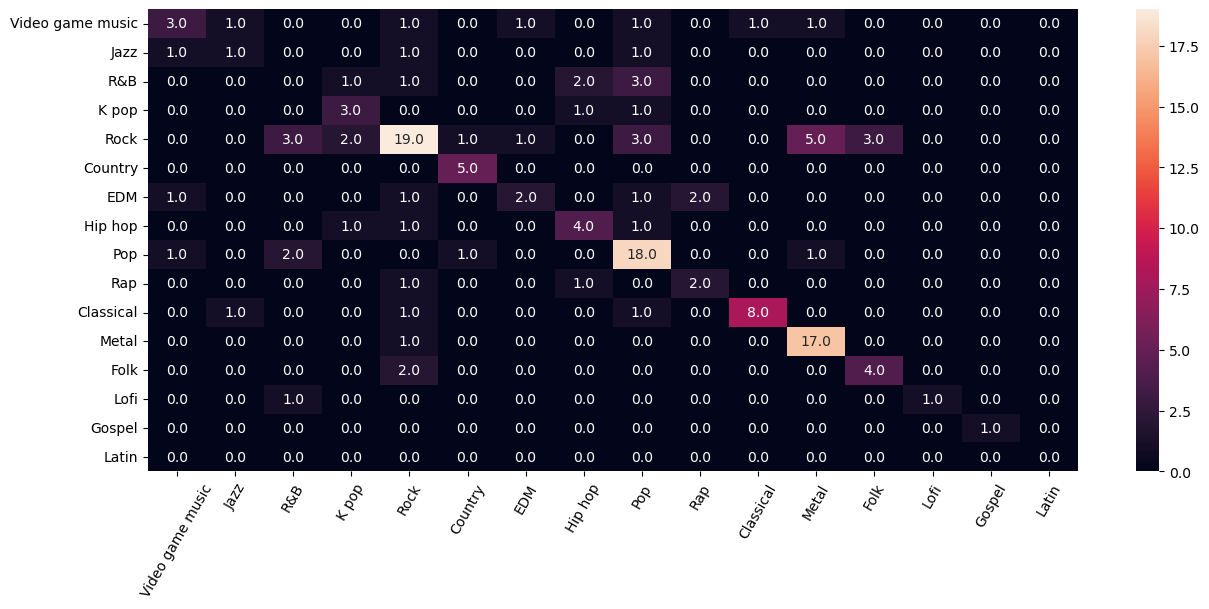

In [40]:
LABEL_MAP = pd.read_csv('/Users/jennaiorio/Documents/Columbia/Spring 2024/Applied Machine Learning/Final Project/label_map.csv')
preds = best_model.predict(x_test)
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.heatmap(tf.math.confusion_matrix(y_test, preds, 16, dtype=tf.dtypes.int32), annot=True, fmt=".1f", xticklabels=LABEL_MAP['Fav genre'], yticklabels=LABEL_MAP['Fav genre'])
plt.xticks(rotation=60)

plt.show()

In [41]:
from sklearn.metrics import classification_report

labels = LABEL_MAP['Fav genre'].copy()
labels = labels.values.tolist()
labels.remove('Latin')
print(classification_report(y_test, preds, target_names=labels))

                  precision    recall  f1-score   support

Video game music       0.50      0.33      0.40         9
            Jazz       0.33      0.25      0.29         4
             R&B       0.00      0.00      0.00         7
           K pop       0.43      0.60      0.50         5
            Rock       0.66      0.51      0.58        37
         Country       0.71      1.00      0.83         5
             EDM       0.50      0.29      0.36         7
         Hip hop       0.50      0.57      0.53         7
             Pop       0.60      0.78      0.68        23
             Rap       0.50      0.50      0.50         4
       Classical       0.89      0.73      0.80        11
           Metal       0.71      0.94      0.81        18
            Folk       0.57      0.67      0.62         6
            Lofi       1.00      0.50      0.67         2
          Gospel       1.00      1.00      1.00         1

        accuracy                           0.60       146
       macro